In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utils import *

pd.set_option('display.max_columns', None)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/keremgura/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/keremgura/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/keremgura/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/keremgura/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.st

AttributeError: _ARRAY_API not found

In [3]:
DATA_PATH = '../../data/networks/match_952209/'
XT_PLOT_PATH = '../../data/smoothed_xt.csv'
"""
WYSCOUT_PATH = DATA_PATH + 'wyscout/'
SKILLCORNER_PATH = DATA_PATH + 'skillcorner/'
SKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
MATCH_IDS_PATH = DATA_PATH + 'matchids.csv'
WYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'
"""

"\nWYSCOUT_PATH = DATA_PATH + 'wyscout/'\nSKILLCORNER_PATH = DATA_PATH + 'skillcorner/'\nSKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'\nXT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'\nMATCH_IDS_PATH = DATA_PATH + 'matchids.csv'\nWYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'\n"

In [4]:
passes_network = pd.read_csv(DATA_PATH + 'passes_network.csv')

In [5]:
passes_network.sort_values(by = 'dxt', ascending= False)

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,match.period,team.name,responsibility.sum,responsibility.count
377,377,33512,3837,-45.625000,-16.493333,-47.000000,1.409231,0.126503,1,Netherland,2.546625,4
267,267,12190,5922,47.916667,12.826667,47.916667,0.000000,0.126292,1,France,0.389950,2
276,276,12218,11516,26.470588,20.160000,48.833333,-12.215556,0.076054,1,France,6.658317,9
366,366,31930,7387,-41.500000,-10.993333,-45.625000,-2.113846,0.075595,1,Netherland,0.536297,1
243,243,11606,16320,34.941176,24.530526,41.500000,5.636923,0.072271,1,France,3.326875,8
...,...,...,...,...,...,...,...,...,...,...,...,...
380,380,33512,7863,-19.058824,-30.357895,12.705882,-25.258947,-0.015362,1,Netherland,1.215239,3
73,73,6028,11606,23.294118,29.629474,3.176471,29.629474,-0.015842,1,France,0.919318,1
247,247,11630,277,42.875000,-29.629474,28.588235,-27.444211,-0.021768,1,France,1.064691,2
66,66,6028,277,-32.823529,-17.715556,-21.176471,-16.493333,-0.023043,2,France,0.776111,1


In [6]:
xt_table = pd.read_csv(XT_PLOT_PATH)
xt_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.000635,0.000676,0.000738,0.000803,0.000857,0.000899,0.000930,0.000952,0.000966,0.000976,0.000983,0.000991,0.001001,0.001018,0.001041,0.001074,0.001114,0.001160,0.001211,0.001262,0.001311,0.001357,0.001399,0.001439,0.001479,0.001522,0.001572,0.001633,0.001708,0.001798,0.001904,0.002026,0.002162,0.002311,0.002471,0.002640,0.002817,0.002996,0.003177,0.003354,0.003524,0.003684,0.003834,0.003975,0.004112,0.004254,0.004409,0.004588,0.004800,0.005050,0.005341,0.005671,0.006034,0.006423,0.006830,0.007249,0.007676,0.008112,0.008561,0.009032,0.009535,0.010081,0.010679,0.011336,0.012052,0.012825,0.013648,0.014511,0.015407,0.016328,0.017269,0.018230,0.019216,0.020235,0.021295,0.022406,0.023574,0.024804,0.026095,0.027440,0.028831,0.030256,0.031705,0.033166,0.034628,0.036078,0.037508,0.038906,0.040262,0.041569,0.042825,0.044042,0.045245,0.046475,0.047782,0.049218,0.050839,0.052700,0.054856,0.057363,0.060270,0.063590,0.067176,0.070499,0.120000
1,0.000626,0.000662,0.000717,0.000775,0.000825,0.000865,0.000897,0.000921,0.000939,0.000954,0.000967,0.000981,0.000997,0.001018,0.001045,0.001079,0.001119,0.001165,0.001214,0.001263,0.001311,0.001357,0.001400,0.001441,0.001483,0.001528,0.001580,0.001642,0.001716,0.001805,0.001909,0.002029,0.002164,0.002313,0.002475,0.002650,0.002834,0.003024,0.003216,0.003406,0.003588,0.003759,0.003916,0.004063,0.004203,0.004347,0.004505,0.004686,0.004902,0.005159,0.005459,0.005800,0.006175,0.006576,0.006994,0.007420,0.007851,0.008286,0.008731,0.009197,0.009694,0.010235,0.010829,0.011484,0.012203,0.012980,0.013810,0.014682,0.015588,0.016518,0.017468,0.018438,0.019433,0.020459,0.021528,0.022647,0.023825,0.025066,0.026369,0.027728,0.029132,0.030572,0.032035,0.033509,0.034986,0.036457,0.037916,0.039360,0.040783,0.042184,0.043563,0.044930,0.046301,0.047703,0.049166,0.050723,0.052408,0.054256,0.056301,0.058577,0.061113,0.063911,0.066852,0.069527,0.071196
2,0.000615,0.000643,0.000687,0.000734,0.000777,0.000815,0.000847,0.000875,0.000900,0.000922,0.000944,0.000966,0.000991,0.001018,0.001050,0.001087,0.001128,0.001172,0.001219,0.001267,0.001314,0.001359,0.001404,0.001448,0.001493,0.001542,0.001597,0.001661,0.001735,0.001822,0.001924,0.002040,0.002172,0.002321,0.002487,0.002668,0.002864,0.003069,0.003278,0.003486,0.003686,0.003872,0.004043,0.004198,0.004345,0.004494,0.004655,0.004842,0.005065,0.005333,0.005648,0.006006,0.006399,0.006817,0.007250,0.007687,0.008124,0.008559,0.009001,0.009460,0.009948,0.010481,0.011070,0.011725,0.012446,0.013231,0.014071,0.014957,0.015877,0.016823,0.017789,0.018775,0.019785,0.020829,0.021915,0.023054,0.024255,0.025521,0.026852,0.028240,0.029675,0.031144,0.032636,0.034138,0.035643,0.037149,0.038656,0.040168,0.041692,0.043233,0.044796,0.046387,0.048010,0.049669,0.051369,0.053113,0.054903,0.056745,0.058640,0.060592,0.062601,0.064652,0.066667,0.068408,0.069463
3,0.000606,0.000627,0.000660,0.000697,0.000734,0.000769,0.000802,0.000833,0.000863,0.000893,0.000923,0.000954,0.000986,0.001020,0.001057,0.001096,0.001137,0.001181,0.001226,0.001273,0.001319,0.001366,0.001413,0.001461,0.001512,0.001566,0.001625,0.001692,0.001767,0.001853,0.001951,0.002064,0.002194,0.002341,0.002508,0.002695,0.002900,0.003118,0.003343,0.003568,0.003784,0.003986,0.004170,0.004337,0.004493,0.004648,0.004817,0.005012,0.005245,0.005525,0.005855,0.006229,0.006639,0.007074,0.007521,0.007969,0.008412,0.008849,0.009289,0.009743,0.010226,0.010754,0.011340,0.011994,0.012719,0.013511,0.014362,0.015261,0.016197,0.017161,0.018146,0.019153,0.020186,0.021255,0.022370,0.023543,0.024781,0.026089,0.027465,0.028901,0.030384,0.031901,0.033436,0.034980,0.036524,0.038071,0.039629,0.041212,0.042834,0.044509,0.046247,0.048052,0.049917,0.051826,

In [7]:
single_row = passes_network[passes_network[passes_network.columns[0]] == 276].iloc[0]

In [8]:
df = pd.DataFrame([single_row] * 105 * 4 * 68 * 4)
df

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,match.period,team.name,responsibility.sum,responsibility.count
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
...,...,...,...,...,...,...,...,...,...,...,...,...
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9


In [9]:
# Define the range for x and y values around the locations
"""
range_ = 10
range_start_x = single_row['location.x'] - range_
range_end_x = single_row['pass.endLocation.x'] + range_
range_start_y = single_row['location.y'] + range_
range_end_y = single_row['pass.endLocation.y'] - range_

# Define the number of points along each axis
num_points_x = 50  # Adjust for desired resolution in x direction
num_points_y = 50  # Adjust for desired resolution in y direction

# Create linearly spaced values across x and y range
x_values = np.linspace(range_start_x, range_end_x, num_points_x)
y_values = np.linspace(range_start_y, range_end_y, num_points_y)
"""
num_points_x = 105*4  # Adjust for desired resolution in x direction
num_points_y = 68*4  # Adjust for desired resolution in y direction

# Create linearly spaced values across x and y range
x_values = np.linspace(-52.5, 52.5, num_points_x)
y_values = np.linspace(-34, 34, num_points_y)

# Create a grid of all combinations of x and y values
grid_x, grid_y = np.meshgrid(x_values, y_values)

# Flatten the grid to create a single list of x and y values for each point in the grid

df['tracking.x'] = grid_x.flatten()
df['tracking.y'] = grid_y.flatten()


In [10]:
df.to_csv('grid_around_pass.csv')

In [11]:
import utils

In [12]:
def responsibility(row, ball_speed=12.0, defender_speed=6.0):
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    player_x = row['tracking.x']
    player_y = row['tracking.y']
    
    # Vector from start to end of the pass
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)
    
    if pass_length == 0:
        return 0  # No pass, no responsibility
    
    # Unit vector along the pass trajectory
    pass_unit_vector = pass_vector / pass_length

    # Time for the ball to travel the length of the pass
    ball_time = pass_length / ball_speed

    # Maximum distance the defender can travel in the same time
    max_defender_distance = defender_speed * ball_time

    # Width of the triangle at the far end (cone edge)
    max_width = 2 * max_defender_distance

    # Find the projection of the player onto the pass vector
    player_vector = np.array([player_x - start_x, player_y - start_y])
    projection_length = np.dot(player_vector, pass_unit_vector)
    
    # Clamp the projection length to the range [0, pass_length]
    projection_length = max(0, min(projection_length, pass_length))

    # Find the closest point on the pass trajectory
    closest_point = np.array([start_x, start_y]) + projection_length * pass_unit_vector

    # Perpendicular distance from the defender to the pass trajectory
    perpendicular_distance = np.linalg.norm(np.array([player_x, player_y]) - closest_point)

    # Calculate the triangle width at the defender's projection point
    triangle_width_at_point = max_width * (projection_length / pass_length)

    # Determine if the player is inside the interceptability region
    if perpendicular_distance <= triangle_width_at_point / 2:
        # Calculate responsibility based on perpendicular distance
        responsibility_score = 1 - (perpendicular_distance / (triangle_width_at_point / 2))
    else:
        # Player is outside the triangle
        responsibility_score = 0

    return responsibility_score

In [13]:
df['tracking.object_id'] = 1
df['responsibility'] = df.apply(responsibility, axis=1)
df

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,match.period,team.name,responsibility.sum,responsibility.count,tracking.x,tracking.y,tracking.object_id,responsibility
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-52.500000,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-52.249403,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-51.998807,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-51.748210,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-51.497613,-34.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,51.497613,34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,51.748210,34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,51.998807,34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,52.249403,34.0,1,0.0


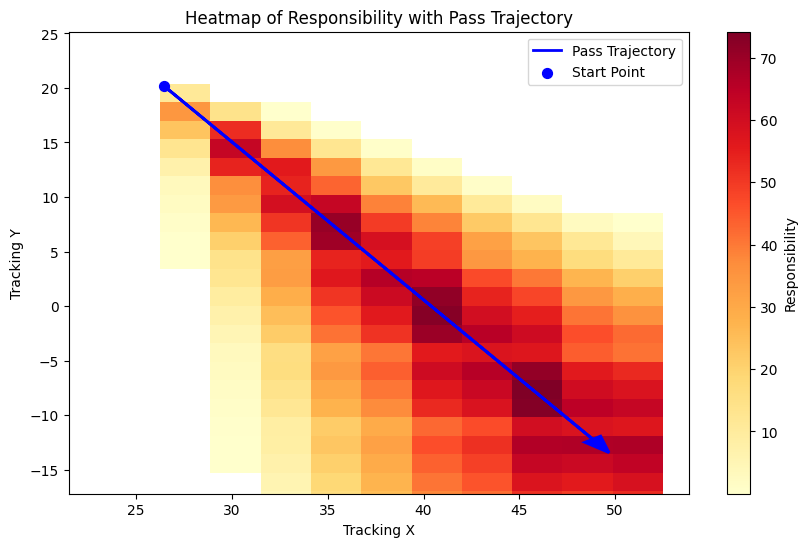

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a 2D histogram heatmap for the responsibility based on tracking.x and tracking.y
# Heatmap using a 2D histogram of tracking.x, tracking.y with responsibility as weights
plt.figure(figsize=(10, 6))

plt.hist2d(df['tracking.x'], df['tracking.y'], weights=df['responsibility'], density= False,
           cmap='YlOrRd', bins=40, cmin=0.001)
plt.colorbar(label='Responsibility')

# Starting and ending points of the pass
start_x, start_y = df['location.x'].iloc[0], df['location.y'].iloc[0]
end_x, end_y = df['pass.endLocation.x'].iloc[0], df['pass.endLocation.y'].iloc[0]

# Overlay the pass trajectory with an arrow
plt.plot([start_x, end_x], [start_y, end_y], color='blue', linestyle='-', linewidth=2, label='Pass Trajectory')
plt.scatter([start_x], [start_y], color='blue', s=50, label='Start Point')  # Mark the start point

# Add an arrow to indicate direction
plt.arrow(start_x, start_y, end_x - start_x, end_y - start_y, 
          head_width=1, head_length=1.5, fc='blue', ec='blue', linewidth=2)
"""
# Overlay the pass trajectory
plt.plot([df['location.x'].iloc[0], df['pass.endLocation.x'].iloc[0]],
         [df['location.y'].iloc[0], df['pass.endLocation.y'].iloc[0]],
         color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Pass Trajectory')
"""
plt.xlim(min(single_row['location.x'], single_row['pass.endLocation.x']) - 5,
         max(single_row['location.x'], single_row['pass.endLocation.x']) + 5)
plt.ylim(min(single_row['location.y'], single_row['pass.endLocation.y']) - 5,
         max(single_row['location.y'], single_row['pass.endLocation.y']) + 5)

# Customize the plot
plt.title("Heatmap of Responsibility with Pass Trajectory")
plt.xlabel("Tracking X")
plt.ylabel("Tracking Y")
plt.legend()

plt.show()

## Best Attacker Option Calculation

In [15]:
passes = pd.read_csv('pass_table.csv')
passes.head()

,frame,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility
0,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False,51,50,42,83,False,False,0.0
1,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True,51,50,42,83,False,False,0.0
2,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False,51,50,42,83,False,False,0.0
3,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False,51,50,42,83,False,False,0.0
4,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False,51,50,42,83,False,False,0.0


In [16]:
DATA_PATH = '../../data/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
xt_table = pd.read_csv(XT_PLOT_PATH)
xt_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.000635,0.000676,0.000738,0.000803,0.000857,0.000899,0.000930,0.000952,0.000966,0.000976,0.000983,0.000991,0.001001,0.001018,0.001041,0.001074,0.001114,0.001160,0.001211,0.001262,0.001311,0.001357,0.001399,0.001439,0.001479,0.001522,0.001572,0.001633,0.001708,0.001798,0.001904,0.002026,0.002162,0.002311,0.002471,0.002640,0.002817,0.002996,0.003177,0.003354,0.003524,0.003684,0.003834,0.003975,0.004112,0.004254,0.004409,0.004588,0.004800,0.005050,0.005341,0.005671,0.006034,0.006423,0.006830,0.007249,0.007676,0.008112,0.008561,0.009032,0.009535,0.010081,0.010679,0.011336,0.012052,0.012825,0.013648,0.014511,0.015407,0.016328,0.017269,0.018230,0.019216,0.020235,0.021295,0.022406,0.023574,0.024804,0.026095,0.027440,0.028831,0.030256,0.031705,0.033166,0.034628,0.036078,0.037508,0.038906,0.040262,0.041569,0.042825,0.044042,0.045245,0.046475,0.047782,0.049218,0.050839,0.052700,0.054856,0.057363,0.060270,0.063590,0.067176,0.070499,0.120000
1,0.000626,0.000662,0.000717,0.000775,0.000825,0.000865,0.000897,0.000921,0.000939,0.000954,0.000967,0.000981,0.000997,0.001018,0.001045,0.001079,0.001119,0.001165,0.001214,0.001263,0.001311,0.001357,0.001400,0.001441,0.001483,0.001528,0.001580,0.001642,0.001716,0.001805,0.001909,0.002029,0.002164,0.002313,0.002475,0.002650,0.002834,0.003024,0.003216,0.003406,0.003588,0.003759,0.003916,0.004063,0.004203,0.004347,0.004505,0.004686,0.004902,0.005159,0.005459,0.005800,0.006175,0.006576,0.006994,0.007420,0.007851,0.008286,0.008731,0.009197,0.009694,0.010235,0.010829,0.011484,0.012203,0.012980,0.013810,0.014682,0.015588,0.016518,0.017468,0.018438,0.019433,0.020459,0.021528,0.022647,0.023825,0.025066,0.026369,0.027728,0.029132,0.030572,0.032035,0.033509,0.034986,0.036457,0.037916,0.039360,0.040783,0.042184,0.043563,0.044930,0.046301,0.047703,0.049166,0.050723,0.052408,0.054256,0.056301,0.058577,0.061113,0.063911,0.066852,0.069527,0.071196
2,0.000615,0.000643,0.000687,0.000734,0.000777,0.000815,0.000847,0.000875,0.000900,0.000922,0.000944,0.000966,0.000991,0.001018,0.001050,0.001087,0.001128,0.001172,0.001219,0.001267,0.001314,0.001359,0.001404,0.001448,0.001493,0.001542,0.001597,0.001661,0.001735,0.001822,0.001924,0.002040,0.002172,0.002321,0.002487,0.002668,0.002864,0.003069,0.003278,0.003486,0.003686,0.003872,0.004043,0.004198,0.004345,0.004494,0.004655,0.004842,0.005065,0.005333,0.005648,0.006006,0.006399,0.006817,0.007250,0.007687,0.008124,0.008559,0.009001,0.009460,0.009948,0.010481,0.011070,0.011725,0.012446,0.013231,0.014071,0.014957,0.015877,0.016823,0.017789,0.018775,0.019785,0.020829,0.021915,0.023054,0.024255,0.025521,0.026852,0.028240,0.029675,0.031144,0.032636,0.034138,0.035643,0.037149,0.038656,0.040168,0.041692,0.043233,0.044796,0.046387,0.048010,0.049669,0.051369,0.053113,0.054903,0.056745,0.058640,0.060592,0.062601,0.064652,0.066667,0.068408,0.069463
3,0.000606,0.000627,0.000660,0.000697,0.000734,0.000769,0.000802,0.000833,0.000863,0.000893,0.000923,0.000954,0.000986,0.001020,0.001057,0.001096,0.001137,0.001181,0.001226,0.001273,0.001319,0.001366,0.001413,0.001461,0.001512,0.001566,0.001625,0.001692,0.001767,0.001853,0.001951,0.002064,0.002194,0.002341,0.002508,0.002695,0.002900,0.003118,0.003343,0.003568,0.003784,0.003986,0.004170,0.004337,0.004493,0.004648,0.004817,0.005012,0.005245,0.005525,0.005855,0.006229,0.006639,0.007074,0.007521,0.007969,0.008412,0.008849,0.009289,0.009743,0.010226,0.010754,0.011340,0.011994,0.012719,0.013511,0.014362,0.015261,0.016197,0.017161,0.018146,0.019153,0.020186,0.021255,0.022370,0.023543,0.024781,0.026089,0.027465,0.028901,0.030384,0.031901,0.033436,0.034980,0.036524,0.038071,0.039629,0.041212,0.042834,0.044509,0.046247,0.048052,0.049917,0.051826,

In [17]:
pitch_length = 105
pitch_width = 68
xt_rows, xt_cols = 68, 105
cell_width = pitch_length / xt_cols
cell_height = pitch_width / xt_rows

def adjust_coordinates(x, y, direction):
    if direction == 'TOP_TO_BOTTOM':
        x = (-x + pitch_length / 2) * 100 / pitch_length
        #x = 105 / 2 - x
        y = (-y + pitch_width / 2) * 100 / pitch_width
        #y = y + pitch_width / 2
    elif direction == 'BOTTOM_TO_TOP':
        x = (x + pitch_length / 2) * 100 / pitch_length
        #x = x- 105 / 2
        y = (y + pitch_width / 2) * 100 / pitch_width
        #y = -y
    return x, y

In [18]:
def get_xt_index(x, y):
    """
    x_index = int(min(max((x + pitch_length / 2) // cell_width, 0), xt_cols - 1))
    y_index = int(min(max((y + pitch_width / 2) // cell_height, 0), xt_rows - 1))"""
    
    x_index = int(min(x // cell_width, xt_table.shape[1] - 1))
    y_index = int(min(y // cell_height, xt_table.shape[0] - 1))

    return x_index, y_index

# Get XT value for a given location
def get_xt_value(x, y, direction):
    adjusted_x, adjusted_y = adjust_coordinates(x, y, direction)
    x_index, y_index = get_xt_index(adjusted_x, adjusted_y)
    return xt_table.iat[y_index, x_index]

In [19]:
def calculate_potential_dxt(row):
    if row['tracking.is_teammate'] and not row['tracking.is_self']:
        start_xt = get_xt_value(row['location.x'], row['location.y'], row['play_direction'])
        end_xt = get_xt_value(row['tracking.x'], row['tracking.y'], row['play_direction'])
        return end_xt - start_xt
    return 0  # Return None if conditions aren't met

In [20]:
passes['potential_dxt'] = passes.apply(calculate_potential_dxt, axis=1)
#passes.iloc[79]

In [21]:
passes

,frame,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility,potential_dxt
0,39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False,51,50,42,83,False,False,0.000000,0.0
1,39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True,51,50,42,83,False,False,0.000000,0.0
2,39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False,51,50,42,83,False,False,0.000000,0.0
3,39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False,51,50,42,83,False,False,0.000000,0.0
4,39,1,Netherland,118,7387,625,7017,-1.058824,0.000000,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False,51,50,42,83,False,False,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20534,57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,20191,31.49,-1.03,0.0,False,80,17,89,42,False,False,0.000000,0.0
20535,57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,12229,31.89,8.13,0.0,False,80,17,89,42,False,False,0.000000,0.0
20536,57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,12246,35.56,12.33,0.0,False,80,17,89,42,False,False,0.766334,0.0
20537,57458,2,Netherland,118,7387,221069,10916,31.764706,21.616842,40.583333,5.636923,BOTTOM_TO_TOP,0.064346,6028,5.09,-7.70,0.0,True,80,17,89,42,False,False,0.000000,0.0


In [22]:
pot = passes[['tracking.object_id', 'location.x', 'location.y', 'play_direction', 'pass.endLocation.x', 'pass.endLocation.y', 'dxt', 'tracking.is_teammate', 'tracking.x', 'tracking.y', 'potential_dxt']]


In [23]:
pot.iloc[46:69]

,tracking.object_id,location.x,location.y,play_direction,pass.endLocation.x,pass.endLocation.y,dxt,tracking.is_teammate,tracking.x,tracking.y,potential_dxt
46,-1,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,22.60,-0.58,0.000000
47,7604,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,-38.43,0.09,0.000000
48,16320,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,-10.79,-6.39,0.000000
49,11516,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,-11.05,5.48,0.000000
50,11630,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,-9.70,-17.12,0.000000
51,11606,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,-12.40,17.19,0.000000
52,12218,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,-0.54,3.12,0.000000
53,277,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,6.47,9.76,0.000000
54,946,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,4.42,-7.53,0.000000
55,5922,22.235294,7.046154,TOP_TO_BOTTOM,26.470588,-14.66,-0.00066,False,5.93,-17.62,0.000000


In [24]:
pot[pot['potential_dxt'] > 0.04]

,tracking.object_id,location.x,location.y,play_direction,pass.endLocation.x,pass.endLocation.y,dxt,tracking.is_teammate,tracking.x,tracking.y,potential_dxt
1655,7387,-16.941176,25.258947,TOP_TO_BOTTOM,-22.235294,31.814737,0.002078,True,-42.25,19.27,0.052927
1793,7387,-42.875000,31.814737,TOP_TO_BOTTOM,-42.875000,23.073684,0.019262,True,-43.47,7.35,0.047033
9686,11516,26.470588,20.160000,BOTTOM_TO_TOP,48.833333,-12.215556,0.076054,True,38.61,-8.79,0.042156
9690,277,26.470588,20.160000,BOTTOM_TO_TOP,48.833333,-12.215556,0.076054,True,41.78,-5.27,0.051146
9759,277,34.941176,24.530526,BOTTOM_TO_TOP,41.500000,5.636923,0.072271,True,42.50,-3.95,0.041938
9761,5922,34.941176,24.530526,BOTTOM_TO_TOP,41.500000,5.636923,0.072271,True,40.75,-15.47,0.040764
11396,12190,37.833333,14.048889,BOTTOM_TO_TOP,36.916667,7.750769,0.011766,True,43.10,-4.35,0.046830
11865,10082,-27.529412,-28.172632,TOP_TO_BOTTOM,-15.882353,-26.715789,-0.013412,True,-38.30,7.50,0.040345
11888,10082,-15.882353,-26.715789,TOP_TO_BOTTOM,-22.235294,-3.523077,0.014825,True,-36.20,10.01,0.042580
13153,5922,-32.823529,-17.715556,TOP_TO_BOTTOM,-21.176471,-16.493333,-0.023043,True,-40.03,13.10,0.046263


In [25]:
passes_table = passes[['frame', 'player.id.skillcorner', 'location.x', 'location.y', 'play_direction', 'tracking.object_id', 'tracking.x', 'tracking.y', 'tracking.is_teammate', 'tracking.is_self', 'potential_dxt']]

In [26]:
def generate_full_defender_dataset(data):
    full_rows = []
    
    # Loop through each frame
    for frame_id in data['frame'].unique():
        frame_data = data[data['frame'] == frame_id]
        
        # Ensure there are 23 player rows in the frame
        player_positions = frame_data[(frame_data['tracking.is_teammate']) | (frame_data['tracking.is_self'])]
        
        # Identify defenders in the frame
        defender_positions = frame_data[~frame_data['tracking.is_teammate'] & ~frame_data['tracking.is_self']]
        
        # Ensure there are 11 defenders (limit to 11 if more)
        defender_positions = defender_positions.head(11)
        
        # Generate rows: for each player position, associate all 11 defenders
        for _, player in player_positions.iterrows():
            for _, defender in defender_positions.iterrows():
                new_row = player.copy()
                new_row['defender_tracking.x'] = defender['tracking.x']
                new_row['defender_tracking.y'] = defender['tracking.y']
                full_rows.append(new_row)
    
    # Convert the list of rows into a DataFrame
    full_dataset = pd.DataFrame(full_rows)
    
    return full_dataset


In [27]:
passes_table = generate_full_defender_dataset(passes_table)

#passes_table = pd.concat([passes_table, passes_table_df], ignore_index=True)
passes_table[passes_table['frame'] == 39]


,frame,player.id.skillcorner,location.x,location.y,play_direction,tracking.object_id,tracking.x,tracking.y,tracking.is_teammate,tracking.is_self,potential_dxt,defender_tracking.x,defender_tracking.y
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,0.40,0.29
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-41.03,-0.05
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-15.86,-7.61
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-16.08,2.42
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-14.54,-18.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-9.69,0.05
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-7.61,9.58
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-6.20,-6.81
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-1.21,-19.48


In [28]:
passes_table[passes_table['frame'] == 39].head(12)

,frame,player.id.skillcorner,location.x,location.y,play_direction,tracking.object_id,tracking.x,tracking.y,tracking.is_teammate,tracking.is_self,potential_dxt,defender_tracking.x,defender_tracking.y
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,0.40,0.29
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-41.03,-0.05
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-15.86,-7.61
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-16.08,2.42
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-14.54,-18.87
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-14.08,17.56
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-9.69,0.05
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-7.61,9.58
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-6.20,-6.81
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-1.21,-19.48


In [29]:
passes_table = passes_table.rename(columns={
    'tracking.x': 'pass.endLocation.x',
    'tracking.y': 'pass.endLocation.y',
    'defender_tracking.x': 'tracking.x',
    'defender_tracking.y': 'tracking.y'
})

In [30]:
passes_table[passes_table['tracking.is_self']].head(10)

,frame,player.id.skillcorner,location.x,location.y,play_direction,tracking.object_id,pass.endLocation.x,pass.endLocation.y,tracking.is_teammate,tracking.is_self,potential_dxt,tracking.x,tracking.y
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,0.40,0.29
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-41.03,-0.05
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-15.86,-7.61
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-16.08,2.42
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-14.54,-18.87
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-14.08,17.56
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-9.69,0.05
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-7.61,9.58
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-6.20,-6.81
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.7,0.9,True,True,0.0,-1.21,-19.48


In [31]:
passes_table['responsibility'] = passes_table.apply(responsibility, axis=1)
#passes_table['responsibility'] = np.where(passes_table['tracking.is_teammate'], 0, passes_table['responsibility'])

In [32]:
def calculate_expected_threat(row, df):
    # Filter for defenders in the same frame and object_id
    
    
    # Calculate the product for each defender
    df['threat_contribution'] = row['potential_dxt'] * (1 - df['responsibility'])
    
    return df['threat_contribution'].tolist()  # Return the calculated values

In [33]:
#passes_table['expected_threat'] = passes_table.apply(lambda row: calculate_expected_threat(row, passes_table), axis=1)

#passes_table['expected_threat'] = passes_table.groupby(['frame', 'tracking.object_id']).apply(calculate_expected_threat).reset_index(level=[0,1], drop=True)

In [36]:
passes_table[passes_table['frame'] == 39]

,frame,player.id.skillcorner,location.x,location.y,play_direction,tracking.object_id,pass.endLocation.x,pass.endLocation.y,tracking.is_teammate,tracking.is_self,potential_dxt,tracking.x,tracking.y,responsibility
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,0.40,0.29,0.613893
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-41.03,-0.05,0.000000
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-15.86,-7.61,0.000000
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-16.08,2.42,0.000000
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007078,-14.54,-18.87,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-9.69,0.05,0.000000
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-7.61,9.58,0.000000
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-6.20,-6.81,0.000000
22,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7387,-0.70,0.90,True,True,0.000000,-1.21,-19.48,0.000000


In [41]:
passes_table.columns

Index(['frame', 'player.id.skillcorner', 'location.x', 'location.y',
       'play_direction', 'tracking.object_id', 'pass.endLocation.x',
       'pass.endLocation.y', 'tracking.is_teammate', 'tracking.is_self',
       'potential_dxt', 'tracking.x', 'tracking.y', 'responsibility'],
      dtype='object')

In [51]:
expected_threat = dict()

for frame in passes_table['frame'].unique():
    for obj in passes_table[passes_table['frame'] == frame]['tracking.object_id'].unique():
        dxt = passes_table[(passes_table['frame'] == frame) & (passes_table['tracking.object_id'] == obj)].iloc[0]['potential_dxt']
        for idx, row in passes_table[(passes_table['frame'] == frame) & (passes_table['tracking.object_id'] == obj)].iterrows():
            """if frame == 39 and obj == 4777:
                print("Example:", dxt, "resp:", row['responsibility'])"""
            dxt = dxt * (1 - row['responsibility'])
            expected_threat[(int(frame), int(obj))] = float(dxt)
            

In [55]:
expected_threat_max = dict()

for k, v in expected_threat.items():
    frame = k[0]
    if frame not in expected_threat_max:
        # Initialize the frame with the first value encountered
        expected_threat_max[frame] = v
    else:
        # Update the maximum value for the frame
        expected_threat_max[frame] = max(expected_threat_max[frame], v)

In [56]:
expected_threat_max

{39: 0.0,
 77: 0.0007876036375995384,
 109: 0.000989889566015121,
 151: 0.0013184814363655002,
 199: 0.0034304726885897607,
 226: 0.0008514383815692002,
 255: 0.0010240021327810188,
 293: 0.0014745358297819052,
 339: 0.0018653745036428901,
 369: 0.00030429780433486356,
 382: 0.0005417692205208855,
 426: 0.0015116891670057591,
 475: 0.003065313565366984,
 517: 0.0008121975130928764,
 542: 0.0005896468076555343,
 580: 0.0013795353160168374,
 617: 0.0009991590099351429,
 644: 0.0009348084176796989,
 698: 0.0017474881598113804,
 718: 0.0022467198739093996,
 728: 0.0037675542061323796,
 749: 0.0009503702246503738,
 781: 0.0014992412012307002,
 808: 0.002145652053870169,
 832: 0.002047275282125284,
 848: 0.0032544108442761482,
 867: 0.0018177059410257298,
 887: 0.0006673460034076654,
 976: 0.0010301199496834,
 1006: 0.000907861166767794,
 1104: 0.00032041271778313697,
 1117: 0.000441428747327,
 1148: 0.0029524621438568512,
 1173: 0.001664551349791743,
 1194: 0.004108898104352863,
 1890: 0.0,

In [57]:
best_options_dataframe = pd.DataFrame(list(expected_threat_max.items()), columns=['frame', 'best_expected_dxt'])
best_options_dataframe.to_csv('best_options_attacker.csv')